# Optimizing Decision Tree Models for Enhanced Accuracy in Diabetes Diagnosis

# What do your blood sugars tell you?

## 📖 Background

Diabetes mellitus remains a global health issue, causing several thousand people to die each day from this single condition. Finding and avoiding diabetes in the earlier stages can help reduce the risk of serious health issues such as circulatory system diseases, kidney malfunction, and vision loss. This competition involves developing a predictive model for effectively detecting potential Diabetes cases, ideally, before commencing preventive treatment.

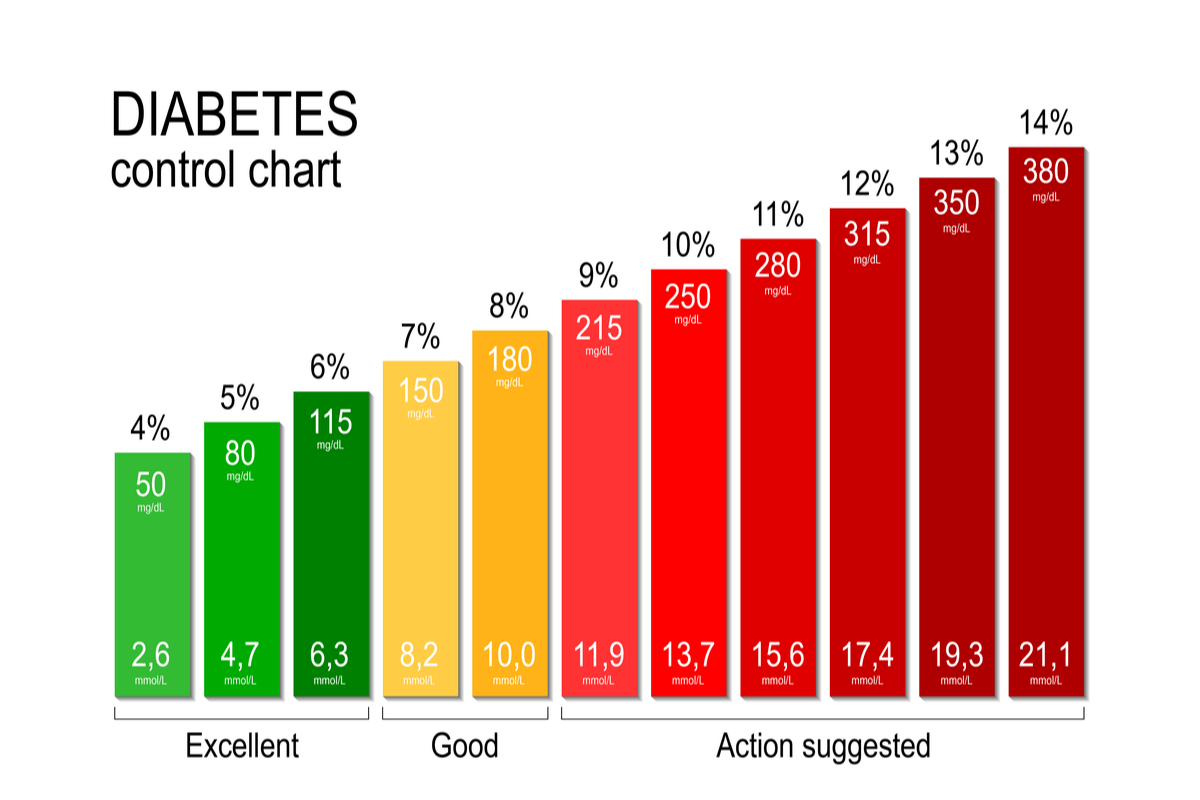

## 💾 The data:

The dataset contains diagnostic measurements that are associated with diabetes, which were collected from a population of Pima Indian women. The data includes various medical and demographic attributes, making it a well-rounded resource for predictive modeling.

The columns and Data Types are as follows:

Pregnancies Type: Numerical (Continuous) Description: Number of times the patient has been pregnant.

Glucose Type: Numerical (Continuous) Description: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

BloodPressure Type: Numerical (Continuous) Description: Diastolic blood pressure (mm Hg).

SkinThickness Type: Numerical (Continuous) Description: Triceps skinfold thickness (mm).

Insulin Type: Numerical (Continuous) Description: 2-Hour serum insulin (mu U/ml).

BMI Type: Numerical (Continuous) Description: Body mass index (weight in kg/(height in m)^2).

DiabetesPedigreeFunction Type: Numerical (Continuous) Description: A function that represents the likelihood of diabetes based on family history.

Age Type: Numerical (Continuous) Description: Age of the patient in years.

Outcome Type: Categorical (Binary) Description: Class variable (0 or 1) indicating whether the patient is diagnosed with diabetes. 1 = Yes, 0 = No.

## 💪 Competition challenge

In this challenge, you will focus on the following key tasks:

1. Determine the most important factors affecting the diabetes outcome.

2. Create interactive plots to visualize the relationship between diabetes and the determined factors from the previous step.

3. What's the risk of a person of Age 54, length 178 cm and weight 96 kg, and Glucose levels of 125 mg/dL getting diabetes?

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Pre-Processing Data

### Import All The Necessary Packages

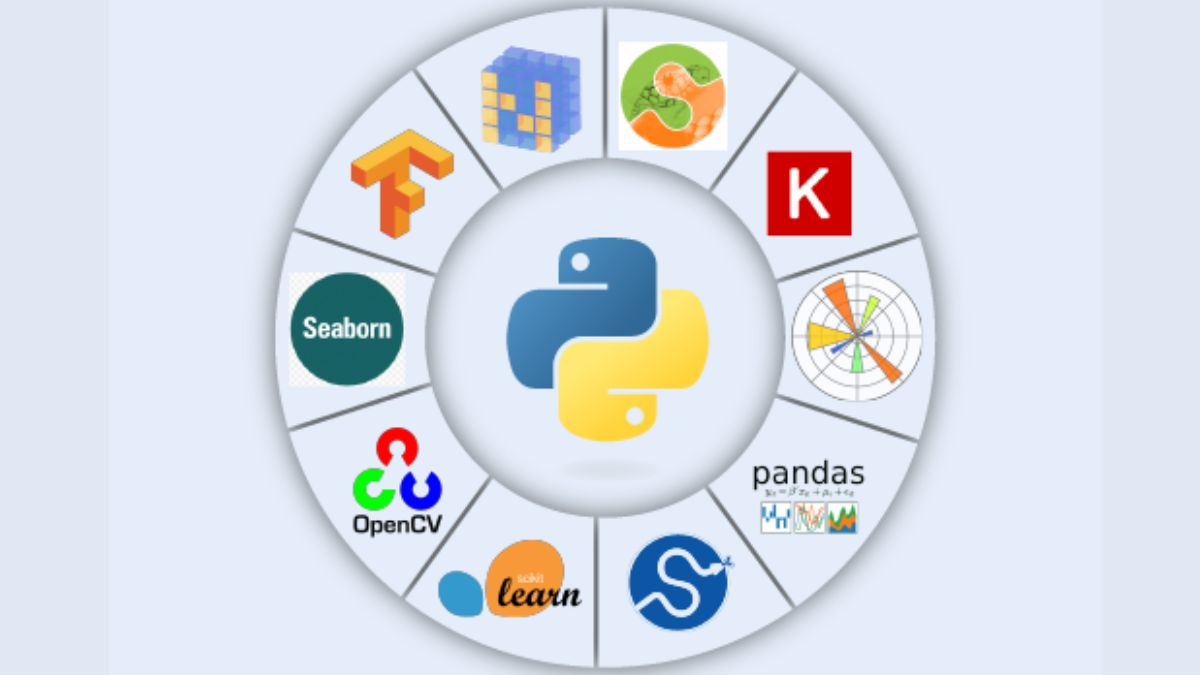

First, we need to import all the necessary packages for this project.

1. pandas - to tidy and clean the dataset

2. numpy - for creating certain features before implementing the decision tree

3. seaborn - to create interesting visualisations

4. matplotlib - to create interesting visualisations (to also tie with plotly graphs)

5. plotly - to create interactive visualisations as needed by the requirements of the question

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Examine The Dataset First

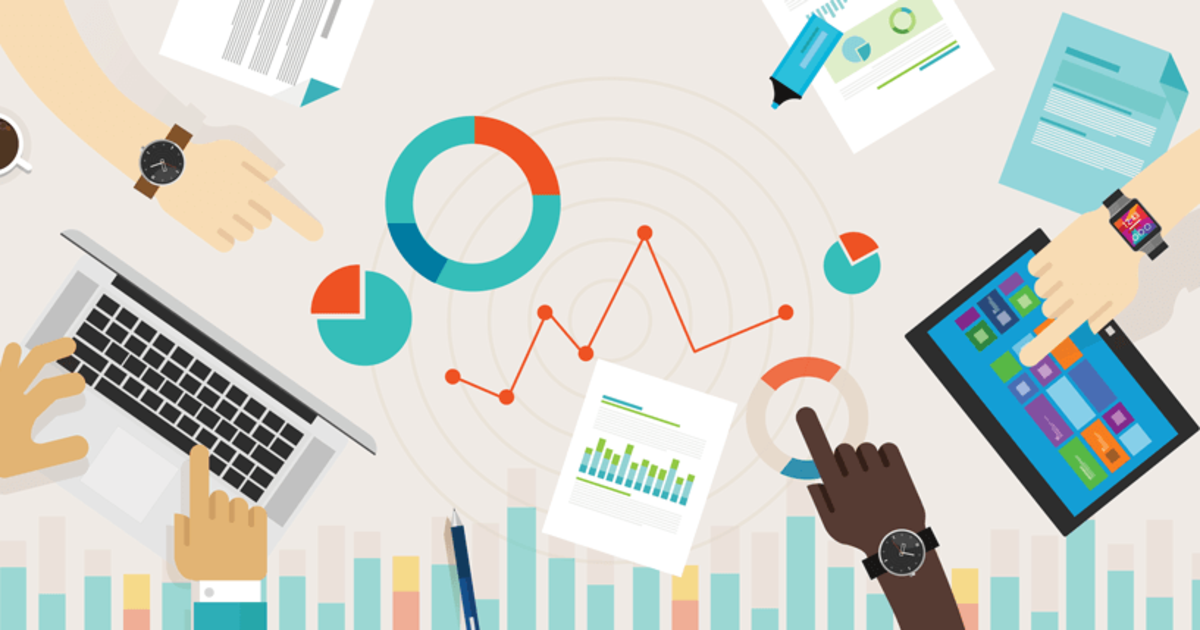

We examine the dataset first to identify all the features and outcome of the dataset. Features of this dataset include Pregnancies, Glucose, BloodPressure, Insulin, BMI, DiabetesPedigreeFunction and Age.

In [29]:
data = pd.read_csv('diabetes.csv')

# Display the first few rows of the DataFrame
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

We observe that the minimum levels of Glucose, Blood Pressure, Skin Thickness, Insulin and BMI are 0, which are not possible for a human to have. Pregnancies can be 0 if the patient does not give birth to any children or is a Male. However, a patient needs to have a minimum level of glucose, minimum blood pressure, have a certain level of skin thickness, a certain amount of insulin and a certain BMI value to survive.

This shows that some data values are incorrect and are imputed with a value of 0 if not known. These values are inaccurate and will skew the outcomes. Hence, we should remove the data with values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin and BMI.

In [30]:
# Remove rows where any of the specified columns have a value of 0
filtered_data = data[(data['Glucose'] != 0) &
                     (data['BloodPressure'] != 0) &
                     (data['SkinThickness'] != 0) &
                     (data['Insulin'] != 0) &
                     (data['BMI'] != 0)]

# Display the first few rows of the filtered DataFrame
filtered_data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
6             3       78             50             32       88  31.0   
8             2      197             70             45      543  30.5   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
16            0      118             84             47      230  45.8   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   
20            3      126             88             41      235  39.3   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21        0  
4                      2.288   33        1  
6                      0.248   26        1  
8                      0.158   53        1  
13                     0.398   59        1  
14                     0.587   51        1  
16                     0.551   31        1  
18                     0.183   33        0  
19                     0.529   32        1  
20                     0.704   27        0

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 1. Determine the most important factor affecting the diabetes outcome

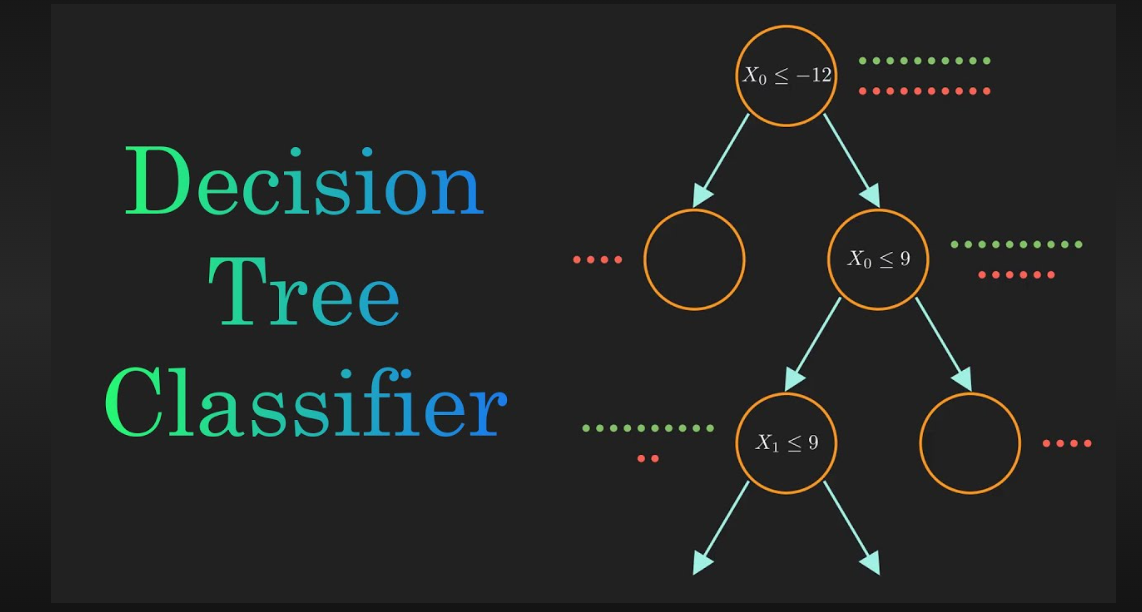

To determine the most important factors affecting the diabetes outcome, the best way is to construct a decision tree and observe the features where the split occurs for the first few branches.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into X (independent variables) and y (dependent variable) accordingly
X = filtered_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = filtered_data['Outcome']

# Perform the train-test-split on X_train and y_train
# We set 80% of the data to be training and 20% of the data to be testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Peform the Decision Tree Classifier on the training dataset
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)

# Determine the accuracy of the Decision Tree Classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Of Decision Tree Classifier (1st round):", accuracy)

Accuracy Of Decision Tree Classifier (1st round): 0.7721518987341772


We observe that the accuracy of the Decision Tree Clasifier is around 74% to 82% when multiple times of the code block above are run, indicating that the accuracy of the Decison Tree Classifier is good (slightly more than 3 in 4 data is predicted correctly).

We can try to improve the accuracy of the Decision Tree Classifier by pruning the tree, tuning the max_depth, min_samples_split and min_samples_leaf variables such that the accuracy score is improved. This can be done via Hyperparameter Tuning, we can obtain the obtimum max_depth, min_samples_leaf and min_samples_split values from a range of values.

In [32]:
from sklearn.model_selection import GridSearchCV

# Creating three separate arrays, one for max_depth, one for min_samples_split and one for min_samples_leaf
param_grid = {
    'max_depth': np.arange(1, 11),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

# Apply the GridSearchCV to determine the optimal parameters for each feature in the param_grid
grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv = 5)

# Similarly, fit the X_train and y_train
grid_search.fit(X_train, y_train)

# Check for the accuracy of the model now using the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 8}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning:

invalid value encountered in cast



In [33]:
# Peform the Decision Tree Classifier on the training dataset with improvements made
decision_tree_classifier_improved = DecisionTreeClassifier(max_depth = 4, min_samples_split = 8, min_samples_leaf = 3, random_state = 0)
decision_tree_classifier_improved.fit(X_train, y_train)
y_pred_improved = decision_tree_classifier_improved.predict(X_test)

# Determine the accuracy of the Decision Tree Classifier with improvements made
accuracy_improved = accuracy_score(y_test, y_pred_improved)
print("Accuracy Of Decision Tree Classifier (2nd round):", accuracy_improved)

Accuracy Of Decision Tree Classifier (2nd round): 0.7468354430379747


We observe that after the hyperparameter tuning, the accuracy of the Decision Tree Classifier remains at about the same value at around 0.75. This shows that the Decision Tree Cassifier has already reached its optimal accuracy even when the best parameters of max_depth, min_samples_split and min_samples_leaf are chosen.

Now, we should proceed to construct the decision tree.

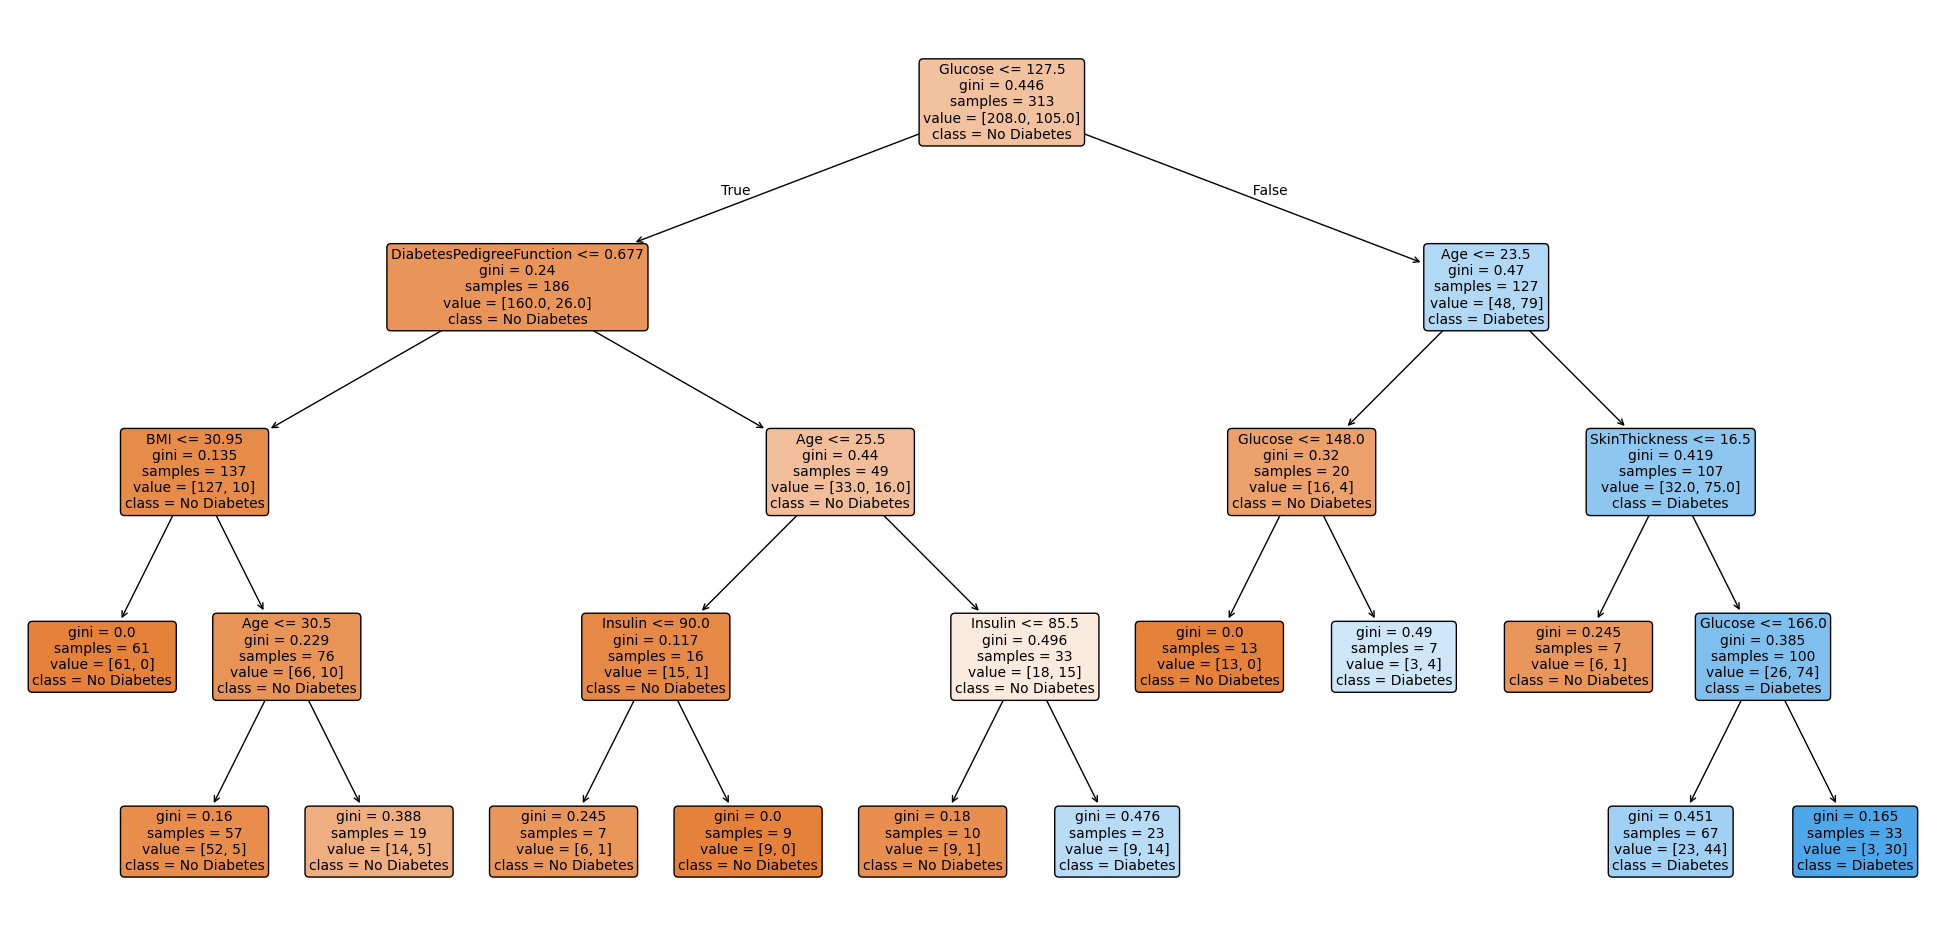

In [34]:
from sklearn.tree import plot_tree

# Update the DecisionTreeClassifier to limit the depth of the tree (prevent overlap of boxes when diagram is drawn)
decision_tree_classifier_limited_depth = DecisionTreeClassifier(max_depth = 4, min_samples_split = 2, min_samples_leaf = 7, random_state = 0)

# Fit the classifier on the training data
decision_tree_classifier_limited_depth.fit(X_train, y_train)

# Plot the decision tree with a max depth of 3
plt.figure(figsize = (25, 12))
plot_tree(decision_tree_classifier_limited_depth,
          feature_names=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
          class_names=['No Diabetes', 'Diabetes'],
          filled = True, rounded = True, fontsize = 10)

# Display the plot
plt.show()

From the diagram of the decision tree, we observe that the forst split is based on Glucose Level, suggesting that Glucose Level is the most important factor in affecting the diabetes outcome. Almost all the leaf observations on the left of the first glucose node classify the patients as no diabetes while on the right of the first glucose node, more than half of the leaf observations classify the patients as diabetes.

Hence, if a patient whose glucose level is less than or equal to 127.5, the patient has likely no diabetes from the tree diagram. However, if the patient has a glucose level of above 123.5, the patient has a much higher chance of getting diabetes and we need to zoom in on other features for more accurate determination.

From the tree diagram, there are other features such as Insulin, Age and Skin Thickness that are also involved in the splitting of the data at deeper levels of the tree, suggesting that Insulin, Age and Skin Thickness are other important factors in affecting the diabetes outcome, apart from Glucose Levels. For instance, when we observe the second level of the decision tree on the right branch, patients with Age of less than 23.5 are mainly classified as No Diabetes while patients with Age of greater than 23.5 are mainly classified as Diabetes.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 2. Create interactive plots to visualize the relationship between diabetes and the determined factors from the previous step.

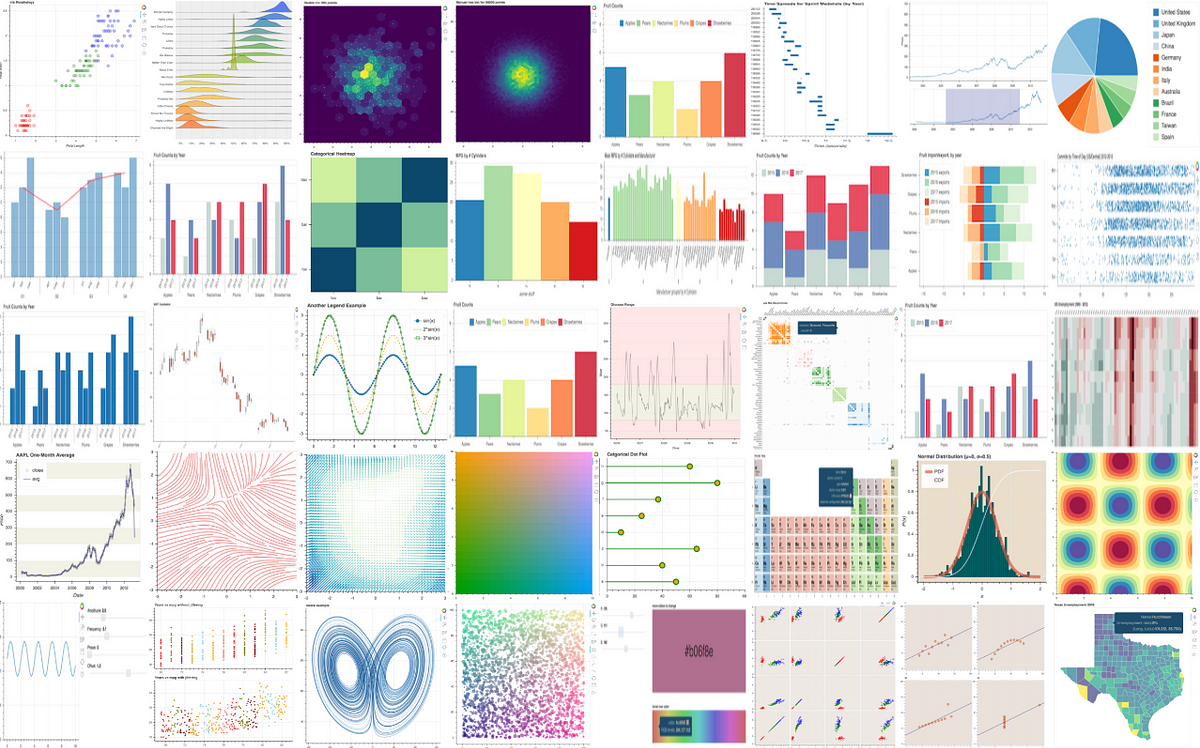

## Glucose Levels

First, we can visualise the data by Glucose Levels as we concluded that Glucose Levels is the most important factor in determining diabetes outcome. We can use a box and whisker diagram to illustrate the differences between the glucose levels of patients with diabetes and patients without diabetes. A box and whisker plot, also known simply as a box plot, provides a clear and concise summary of the distribution of a dataset. It highlights key statistical measures and helps in comparing distributions between different groups.

In [35]:
# Ensure 'Outcome' is treated as a categorical variable
filtered_data.loc[:, 'Outcome'] = filtered_data['Outcome'].astype('category')

# Map Outcome values to more descriptive labels for clarity
filtered_data.loc[:, 'Outcome'] = filtered_data['Outcome'].map({0: 'No Diabetes', 1: 'Diabetes'})

# Create a boxplot of Glucose levels by Outcome
fig = px.box(filtered_data, x='Outcome', y='Glucose', color='Outcome',
             color_discrete_map={'No Diabetes': 'blue', 'Diabetes': 'red'},
             title="Glucose Levels by Diabetes Outcome",
             labels={'Outcome': 'Diabetes Outcome', 'Glucose': 'Glucose Level (mg/dL)'})

# Add mean points on the boxplot
mean_values = filtered_data.groupby('Outcome', observed=False)['Glucose'].mean().reset_index()
fig.add_trace(go.Scatter(x=mean_values['Outcome'],
                         y=mean_values['Glucose'],
                         mode='markers',
                         marker=dict(color='black', size=10, symbol='diamond'),
                         name='Mean Glucose'))

# Update layout to match the styling of the previous Matplotlib plot
fig.update_layout(
    xaxis_title="Diabetes Outcome", yaxis_title="Glucose Level (mg/dL)", title_font=dict(size=16, family='Arial', weight='bold'),
    xaxis=dict(tickvals=['No Diabetes', 'Diabetes'], ticktext=['No Diabetes', 'Diabetes']),
    yaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.2)', gridwidth=0.7),
    legend_title=dict(text='Outcome'),
    legend=dict(x=1.05, y=1, traceorder='normal', orientation='v', title='Outcome', font=dict(size=12)),
    font=dict(size=12)
)

fig.show()


From the box-and-whisker diagram, we observe that the median glucose level for patients with diabetes (around 144 mg/dL) is higher than the median glucose level for patients without diabetes (around 107 mg/dL). Similarly, when comparing thr mean glcose level from the point plots, patients with diabetes (around 143 mg/dL) is higher compared to patients without diabetes (around 113 mg/dL). Similarly, the minimum, maximum, 75th percenile and 25th percentile of patients with diabetes all have higher glucose levels compared to those without diabetes.

To zoom in on the accuracy, we can perform deeper statistical analysis on the glucose levels of patients with and without diabetes.

In [46]:
# Compute descriptive statistics for glucose levels based on the diabetes outcome
stats = filtered_data.groupby('Outcome', observed=False)['Glucose'].agg(
    Mean='mean',
    Median='median',
    Min='min',
    Max='max',
    Percentile_25=lambda x: x.quantile(0.25),
    Percentile_75=lambda x: x.quantile(0.75)
)

# Transpose the table to have statistics as rows and Diabetes/No Diabetes as columns
stats = stats.T
stats.columns = ['No Diabetes', 'Diabetes']

# Function to highlight greater values in yellow
def highlight_greater(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply highlighting to the table and beautify it
styled_stats = (stats.style
                .apply(highlight_greater, axis=1)
                .format("{:.2f}")
                .set_caption("Glucose Levels: Descriptive Statistics for Diabetes vs No Diabetes")
                .set_table_styles([
                    {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold'), ('font-size', '18px'), ('padding', '12px')]},
                    {'selector': 'tbody td', 'props': [('border', '1px solid black'), ('padding', '10px'), ('font-size', '16px')]},
                    {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '20px'), ('font-weight', 'bold')]},
                    {'selector': 'table', 'props': [('width', '100%'), ('margin', 'auto')]}
                ])
                .background_gradient(cmap='Greens', subset=['No Diabetes', 'Diabetes'])
               )

# Display the styled table
styled_stats


The image above compares glucose levels between individuals with and without diabetes using several descriptive statistics:

Mean: The average glucose level is 111.43 for those with diabetes and 145.19 for those without.

Median: The middle value is 107.50 for those with diabetes and 144.50 for those without.

Minimum (Min): The lowest glucose level is 56.00 for those with diabetes and 78.00 for those without.

Maximum (Max): The highest glucose level is 197.00 for those with diabetes and 198.00 for those without.

25th Percentile: The value below which 25% of the data falls is 94.00 for those with diabetes and 124.25 for those without.

75th Percentile: The value below which 75% of the data falls is 126.00 for those with diabetes and 171.75 for those without.

## Age Distribution

To visualize the distribution of ages among patients with diabetes versus those without diabetes using a Kernel Density Estimate (KDE) plot. A Kernel Density Estimate (KDE) plot is a smooth, continuous estimate of the probability density function of a random variable. It provides a way to visualize the distribution of data points in a more continuous manner compared to histograms.This plot helps us understand how age varies between these two groups and identifies any significant differences in their age distributions.

In [47]:
# Ensure 'Outcome' is treated as a categorical variable using .loc
filtered_data.loc[:, 'Outcome'] = filtered_data['Outcome'].astype('category')

# Create a density plot of Age by Outcome using px.histogram
fig = px.histogram(filtered_data, x='Age', color='Outcome',
                   color_discrete_map={'0': 'blue', '1': 'yellow'},
                   histnorm='density',
                   title="Age Distribution by Diabetes Outcome",
                   labels={'Outcome': 'Diabetes Outcome', 'Age': 'Age'},
                   barmode='overlay')

# Add median lines without annotations
median_values = filtered_data.groupby('Outcome', observed=False)['Age'].median()
for outcome, color in zip(median_values.index, ['#004080', '#FF0000']):
    fig.add_vline(x=median_values[outcome], line=dict(color=color, dash='dash'))

# Update layout to match the desired legend
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Density",
    title_font=dict(size=16, family='Arial', weight='bold'),
    xaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.2)', gridwidth=0.7),
    yaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.2)', gridwidth=0.7),
    legend_title=dict(text='Legend'),
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        orientation='v',
        title='Statistics',
        font=dict(size=12),
        itemsizing='constant'
    ),
    font=dict(size=12),
    legend_title_font_size=13
)

# Replace the legend labels for the density plot traces
for trace in fig.data:
    if trace.name == '0':
        trace.name = 'Patients without diabetes (blue shaded area)'
        trace.marker.color = 'blue'
    elif trace.name == '1':
        trace.name = 'Patients with diabetes (yellow shaded area)'
        trace.marker.color = 'yellow'

# Add custom legend entries
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='#FF0000', dash='dash'), name='Median age of patients with diabetes'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='#004080', dash='dash'), name='Median age of patients without diabetes'))

# Show the figure
fig.show()


The image shows a graph titled “Age Distribution by Diabetes Outcome.” It is a KDE density plot comparing the age distributions of individuals with and without diabetes.

Blue Distribution: Represents individuals without diabetes.

Orange Distribution: Represents individuals with diabetes.

Red Dashed Line: Indicates the median age of patients with diabetes.

Blue Dashed Line: Indicates the median age of patients without diabetes.

This graph visually demonstrates the frequency (density) of age measurements for both groups, highlighting potential differences in age distribution between individuals with and without diabetes.

From the dotted lines, we observe that the median age of patients with diabetes (around 33) is significantly higher than the median age of patients without diabetes (around 25). The distribution of the patients without diabetes is right-skewed where most of the patients fall under tha age range of between 20 and 30. Conversely, the distribution of the patients with diabetes is more symmetrical where there is quite a uniform spread of patient ages from 20 to 60.

This shows that a patient who is older (for example 40 years old) is more likely to get diabetes compared to a patient who is younger (for example 25 years old).



## Insulin Levels

We can also compare the levels of insulin of patients with and without diabetes, this time by drawing a box and whisker diagram.

In [48]:
# Ensure 'Outcome' is treated as a categorical variable using .loc
filtered_data.loc[:, 'Outcome'] = filtered_data['Outcome'].astype('category')

# Create a boxplot of Insulin levels by Outcome
fig = px.box(filtered_data, x='Outcome', y='Insulin', color='Outcome',
             color_discrete_map={'0': 'blue', '1': 'red'},  # Custom color mapping for clarity
             title="Insulin Levels by Diabetes Outcome",
             labels={'Outcome': 'Diabetes Outcome', 'Insulin': 'Insulin Level (μU/mL)'})

# Add mean points on the boxplot
mean_values = filtered_data.groupby('Outcome', observed=False)['Insulin'].mean().reset_index()
fig.add_trace(go.Scatter(x=mean_values['Outcome'],
                         y=mean_values['Insulin'],
                         mode='markers',
                         marker=dict(color='black', size=10, symbol='diamond'),
                         name='Mean Insulin'))

# Update layout to match the styling of the previous Matplotlib plot
fig.update_layout(
    xaxis_title="Diabetes Outcome",
    yaxis_title="Insulin Level (μU/mL)",
    title_font=dict(size=16, family='Arial', weight='bold'),
    xaxis=dict(tickvals=[0, 1], ticktext=['No Diabetes', 'Diabetes']),
    yaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.2)', gridwidth=0.7),
    legend_title=dict(text='Outcome'),
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        orientation='v',
        title='Outcome',
        font=dict(size=12)
    ),
    font=dict(size=12)
)

# Show the figure
fig.show()


From the box-and-whisker diagram, we observe that patients with diabetes have higher mean levels of insulin (206 microU/mL) compared to patients without diabetes (131 microU/mL). In terms of the median, upper quartile and lower quartile values, patients with diabetes also have higher insulin levels than those who do not have diabetes.

To view the statistical analysis for insulin levels, we can also construct a statistical table to illustrate the differences in the levels of insulin between patients with and without diabetes.

In [49]:
# Compute descriptive statistics for insulin levels based on the diabetes outcome
stats = filtered_data.groupby('Outcome', observed=False)['Insulin'].agg(
    Mean='mean',
    Median='median',
    Min='min',
    Max='max',
    Percentile_25=lambda x: x.quantile(0.25),
    Percentile_75=lambda x: x.quantile(0.75)
)

# Transpose the table to have statistics as rows and Diabetes/No Diabetes as columns
stats = stats.T
stats.columns = ['No Diabetes', 'Diabetes']

# Function to highlight greater values in yellow
def highlight_greater(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply highlighting to the table and beautify it
styled_stats = (stats.style
                .apply(highlight_greater, axis=1)
                .format("{:.2f}")
                .set_caption("Insulin Levels: Descriptive Statistics for Diabetes vs No Diabetes")
                .set_table_styles([
                    {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('font-weight', 'bold'), ('font-size', '18px'), ('padding', '12px')]},
                    {'selector': 'tbody td', 'props': [('border', '1px solid black'), ('padding', '10px'), ('font-size', '16px')]},
                    {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '20px'), ('font-weight', 'bold')]},
                    {'selector': 'table', 'props': [('width', '100%'), ('margin', 'auto')]}
                ])
                .background_gradient(cmap='Greens', subset=['No Diabetes', 'Diabetes'])
               )

# Display the styled table
styled_stats


The image above compares insulin levels between individuals with and without diabetes using several descriptive statistics:

Mean: The average insulin level is 130.85 for those with diabetes and 206.85 for those without.

Median: The middle value is 105.00 for those with diabetes and 169.50 for those without.

Minimum (Min): The lowest insulin level is 15.00 for those with diabetes and 14.00 for those without.

Maximum (Max): The highest insulin level is 744.00 for those with diabetes and 846.00 for those without.

25th Percentile: The value below which 25% of the data falls is 66.00 for those with diabetes and 127.50 for those without.

75th Percentile: The value below which 75% of the data falls is 163.75 for those with diabetes and 239.25 for those without.



## Skin Thickness

For skin thickness levels, we can plot the skin thickness of patients with diabetes and patients without diabetes in a KDE plot.



In [50]:
# Ensure 'Outcome' is treated as a categorical variable using .loc
filtered_data.loc[:, 'Outcome'] = filtered_data['Outcome'].astype('category')

# Create a density plot of SkinThickness by Outcome using px.histogram
fig = px.histogram(filtered_data, x='SkinThickness', color='Outcome',
                   color_discrete_map={'0': 'blue', '1': 'yellow'},
                   histnorm='density',
                   title="Skin Thickness Distribution by Diabetes Outcome",
                   labels={'Outcome': 'Diabetes Outcome', 'SkinThickness': 'Skin Thickness'},
                   barmode='overlay')

# Add median lines without annotations
median_values = filtered_data.groupby('Outcome', observed=False)['SkinThickness'].median()
for outcome, color in zip(median_values.index, ['#004080', '#FF0000']):
    fig.add_vline(x=median_values[outcome], line=dict(color=color, dash='dash'))

# Update layout to match the desired legend
fig.update_layout(
    xaxis_title="Skin Thickness",
    yaxis_title="Density",
    title_font=dict(size=16, family='Arial', weight='bold'),
    xaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.2)', gridwidth=0.7),
    yaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.2)', gridwidth=0.7),
    legend_title=dict(text='Legend'),
    legend=dict(
        x=1.05,
        y=1,
        traceorder='normal',
        orientation='v',
        title='Statistics',
        font=dict(size=12),
        itemsizing='constant'
    ),
    font=dict(size=12),
    legend_title_font_size=13
)

# Replace the legend labels for the density plot traces
for trace in fig.data:
    if trace.name == '0':
        trace.name = 'Patients without diabetes (blue shaded area)'
        trace.marker.color = 'blue'
    elif trace.name == '1':
        trace.name = 'Patients with diabetes (yellow shaded area)'

# Add custom legend entries
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='#FF0000', dash='dash'), name='Median skin thickness of patients with diabetes'))
fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', line=dict(color='#004080', dash='dash'), name='Median skin thickness of patients without diabetes'))

# Show the plot
fig.show()


The image shows a KDE Plot titled “Skin Thickness Distribution by Diabetes Outcome.” It compares the skin thickness measurements of individuals with and without diabetes.

Blue Distribution: Represents individuals without diabetes.

Orange Distribution: Represents individuals with diabetes.

Red Dashed Line: Indicates the median skin thickness of patients with diabetes.

Yellow Dashed Line: Indicates the median skin thickness of patients without diabetes.

The KDE Plot visually demonstrates the frequency (density) of skin thickness measurements for both groups, highlighting potential differences in skin thickness between individuals with and without diabetes.

From the KDE plot, we observe that for skin thickness, the median skin thickness of patients with diabetes (around 33mm) is higher than the median skin thickness of patients without diabetes (around 27mm). Both the distributions of skin thickness for diabetic and non-diabetic patients are roughly symmetrical and are not really skewed.

## Implications Of The Visualisations

From the different features that we tested on which are more important factors affecting diabetes outcome, we can conclude that:

1. Patients with diabetes have higher glucose levels compared to patients without diabetes

2. Patients with diabetes are generally older than patients without diabetes

3. Patients with diabetes have higher insuline levels compared to patients without diabetes

4. Patients with diabetes have thicker skins comoared to patients without diabetes

There are othe features sich as Blood Pressure, BMI and Diabetes Pedigree Function which are not included in the analysis above as these features are less involved in the decision tree constructed but they too might have a slight impact on the diabetes outcome, particularly if the max_depth of the tree is increased to increase more nodes.

## Exploring Other Features (Bonus)

We can analyze the relationship between each feature and the outcome (diabetes vs. no diabetes) using a correlation heatmap. A higher correlation value indicates a stronger association between the feature and the outcome.

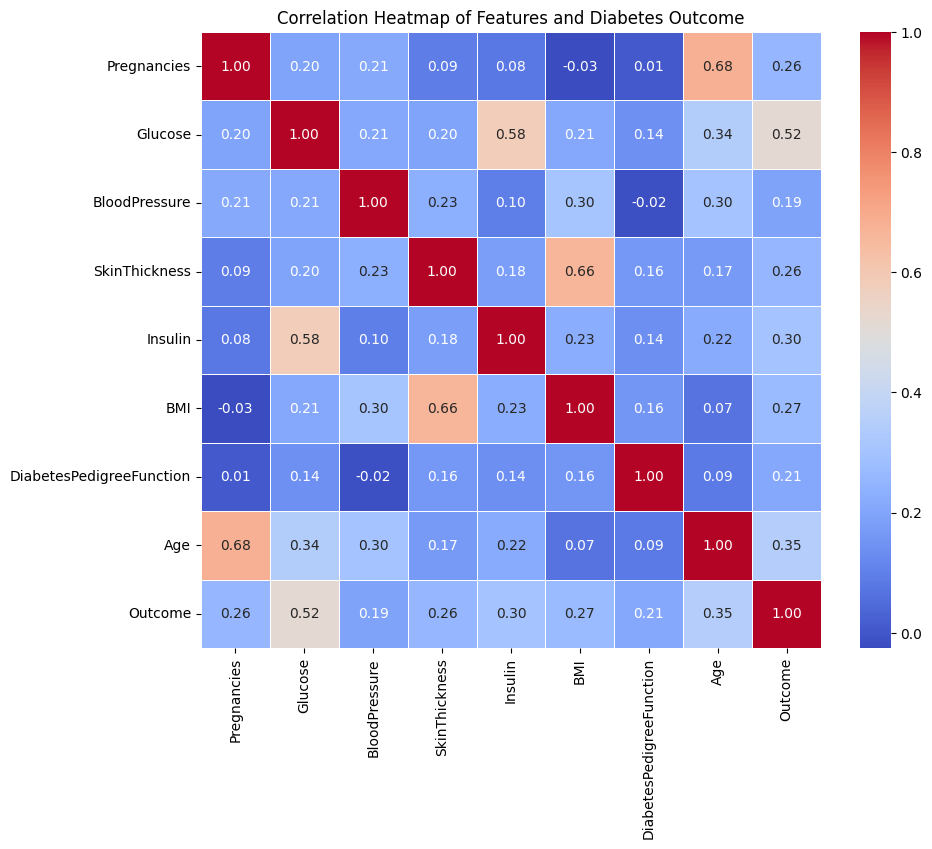

In [51]:
# Convert categorical target ('No Diabetes', 'Diabetes') to numeric (0, 1) using .loc
filtered_data.loc[:, 'Outcome'] = filtered_data['Outcome'].map({'No Diabetes': 0, 'Diabetes': 1})

# Check for any remaining non-numeric columns and handle if necessary
# You can drop or convert them if they aren't needed or are irrelevant for correlation
filtered_data = filtered_data.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
corr_matrix = filtered_data.corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap of Features and Diabetes Outcome')
plt.show()

Observe the last column values of the heatmap. The values represent the respective correlation between the feature and the outcome. We observe that from the last column,

Glucose and Outcome (Highest correlation of 0.52)

Age and Outcome (Second highest correlation of 0.35)

Insulin and Outcome (Third highest correlation of 0.30)

These are the top 3 features that have the highest correlation with respect to outcome, which we have extracted and explored above. These features exactly coincides with the decision tree seperators.

Other features include:

BMI and Outcome (Correlation of 0.27)

Skin Thickness and Outcome (Correlation 0f 0.26)

Pregnancies and Outcome (Correlation of 0.26)

Diabetes Pedegree Function and Outcome (Correlation of 0.21)

Blood Pressure and Outcome (Lowest Correlation of 0.19)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 3. What's the risk of a person of Age 54, length 178 cm and weight 96 kg, and Glucose levels of 125 mg/dL getting diabetes?

From the information provided, we are only given Age, Weight (Not a current feature), Length (Not a current feature) and Glucose levels. Information on Pregnancies, Blood Pressure, Skin Thickness, Insulin and Diabetes Pedigree Function values are not given.

However, we can find the patient's BMI using the formula BMI = Weight / (Height) ** 2

Patient's BMI = 96 / (1.78) ** 2 = 30.29920 = 30.3 (1 decimal place)

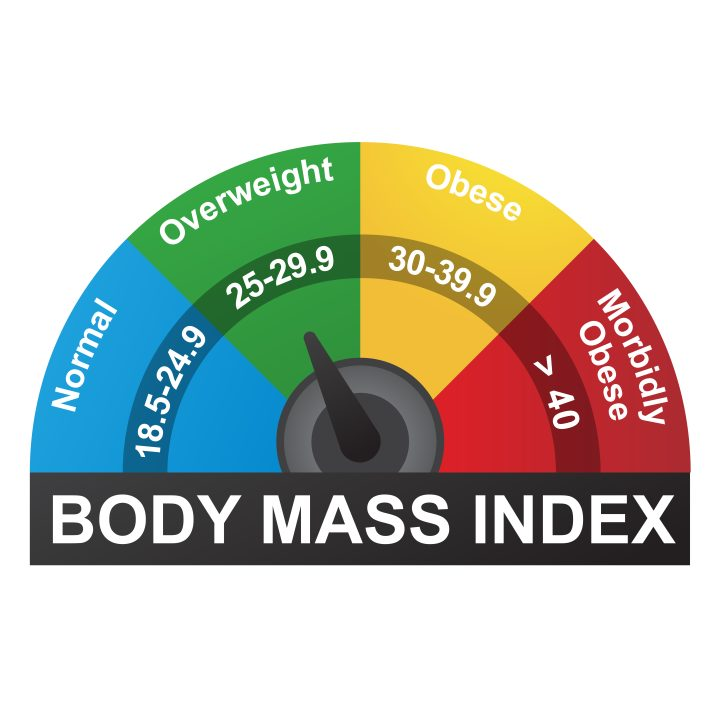

We need to remake a new decision tree such that only the three features - Age, BMI and Glucose Levels are considered. The training and testing data should still involve the non-zero values of Glucose levels and BMI. We need to perform the data cleaning and filtering first before making the decision tree.

Note: We will omit the Hyperparameter Tuning for this part of the question for simplicity.

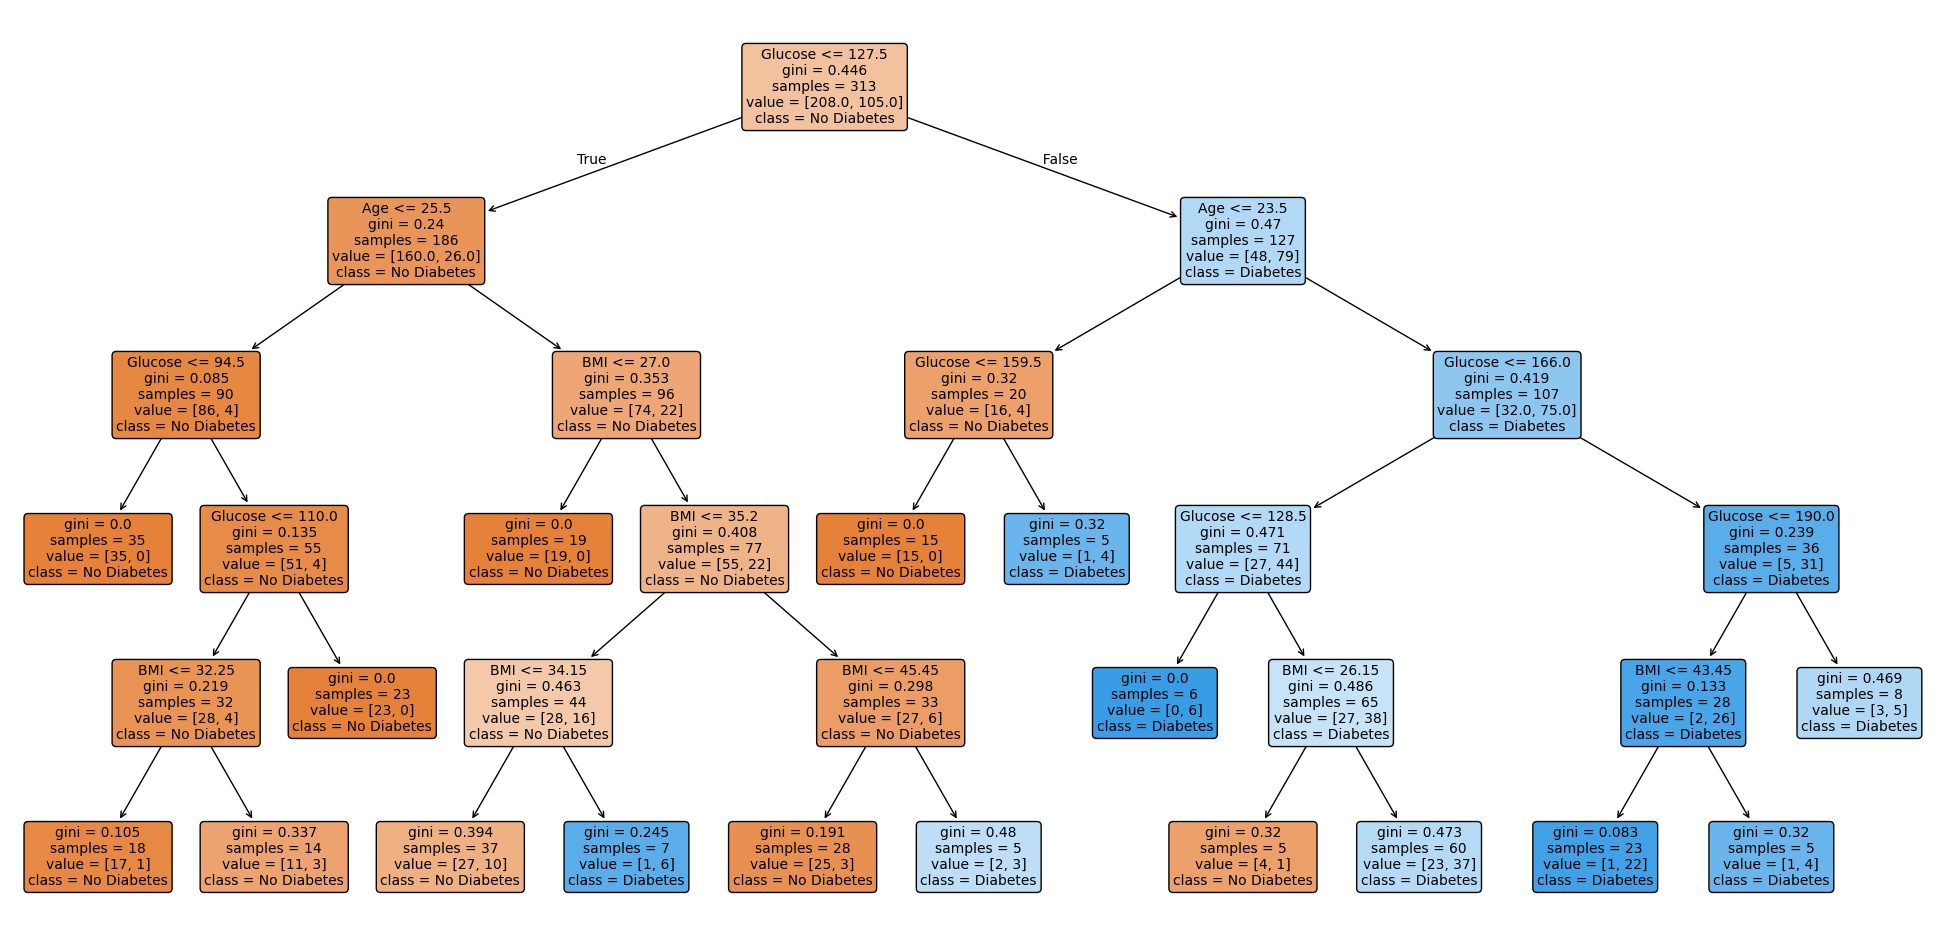

In [42]:
# Split the data into X (independent variables) and y (dependent variable) accordingly using the three features included
X = filtered_data[['Glucose', 'BMI', 'Age']]
y = filtered_data['Outcome']

# Perform the train-test-split on X_train and y_train
# We set 80% of the data to be training and 20% of the data to be testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Peform the Decision Tree Classifier on the training dataset
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_pred = decision_tree_classifier.predict(X_test)

# Update the DecisionTreeClassifier
decision_tree_classifier_two = DecisionTreeClassifier(max_depth = 5, min_samples_split = 2, min_samples_leaf = 5, random_state = 0)

# Fit the classifier on the training data
decision_tree_classifier_two.fit(X_train, y_train)

# Plot the decision tree with a max depth of 3
plt.figure(figsize = (25, 12))
plot_tree(decision_tree_classifier_two,
          feature_names=['Glucose', 'BMI', 'Age'],
          class_names=['No Diabetes', 'Diabetes'],
          filled = True, rounded = True, fontsize = 10)

# Display the plot
plt.show()

From the decision tree constructed,

Patient's glucose level is 125 mg/dL, which is lower than 127.5 mg/dL, hence goes to the right branch.

Patient's age is 54, which is older than 23.5, hence goes to the left branch.

Patient's glucose level is 125 mg/dL, which is lower than 159.5 mg/dL, hence goes to the right branch.

Leaf node is reached and it can be concluded that the Patient has no diabetes.



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Other Useful Diagrams (Bonus Section)

## 1. Displaying the relationship between BMI and Outcome

We can display the relationship between the patients' BMI value and the outcome of the patient through a violin plot in plotly. A violin plot is a data visualization tool used to display the distribution of a continuous variable across different categories. It combines aspects of a box plot and a kernel density plot, providing insights into the data’s distribution, density, and statistical summary.

In [43]:
# Map the numeric 'Outcome' values to descriptive labels
filtered_data['Outcome'] = filtered_data['Outcome'].map({0: 'No Diabetes', 1: 'Diabetes'})

# Create the violin plot with descriptive labels for the x-axis and legend
fig = px.violin(filtered_data,
                x='Outcome',
                y='BMI',
                box=True,
                points='all',
                title='Distribution of BMI by Outcome (Diabetes vs. No Diabetes)',
                color='Outcome',
                category_orders={"Outcome": ['No Diabetes', 'Diabetes']})

# Show the plot
fig.show()

We observe that although BMI is not one of the most important factors that determines the outcome of the patient, there is still a significant difference between the BMI values of patients with diabetes and patients with no diabetes.

From the violin plot,

1. Patients with no diabetes generally have lower BMI values than patients witg diabetes - Most patients with no diabetes have BMI values of between 20 and 40 while most patients with diabetes have BMI values of between 30 and 50.

2. Median BMI value for patients without diabetes (31.25) is lower than the median BMI value for patients with diabetes (34.6).

3. There are more extreme high BMI values for patients with diabetes than for patients without diabetes.

Thus, if a patient's BMI value is higher, the chances of the patient having diabetes will also be increased.

## 2. Displaying the relationship between pregnancies and outcome

Additionally, we can display the relationship between pregnancies and outcome of patient using a bar graph in plotly. A bar graph is highly suitable for pregnancies as pregnancies take on multiple discrete values within a specified range (0 to 17).

In [44]:
# Aggregate the data to count the number of pregnancies for each outcome
agg_data = filtered_data.groupby(['Pregnancies', 'Outcome']).size().reset_index(name='Count')

# Create a bar chart using Plotly Express
fig = px.bar(agg_data,
             x='Pregnancies',
             y='Count',
             color='Outcome',
             barmode='group',
             title='Distribution of Pregnancies by Outcome (Diabetes vs. No Diabetes)',
             labels={'Pregnancies': 'Number of Pregnancies', 'Count': 'Count'},
             text='Count')

# Update x-axis to display all numbers from 0 to 17
fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1,
        range=[-0.5, 17.5]  # Adjust range to include 0 to 17
    )
)

# Show the plot
fig.show()

From the bar chart, we observe a couple of interesting trends regarding the number of pregnancies for patients with diabetes and patients with no diabetes:

1. Patients with no diabetes generally have fewer pregnancies (most are in the range of 0 to 4 pregnancies) while patients with diabetes have a wider range of number of pregancies (higher proportion of patients have more pregnancies like 7 and 8).

2. The distrbution of the number of pregnancies of patients without diabetes is right-skewed while the distribution of patients with diabetes is more random with more high values.

3. There are more extreme outliers for patients with diabetes having an exceptionally high number of pregnancies (like 14 to 17 pregnancies).

We can conclude that although the relationship between number of pregnancies and diabetes outcome is not significant, there is a trend that patients with diabetes generally have more pregnancies than patients who do not have diabetes.



## 3. Displaying the relationship between Diabetes Pedigree Function and outcome

For Diabetes Pedigree Function, which includes a range of continuous values, it is better to display the relationship between Diabetes Pedigree Function and outcome of patients using a Contour Density Plot. In Plotly, a contour plot is used to display the density of data points in a 2D space. It's useful for visualizing the distribution of continuous variables and understanding the density of observations in different regions of the plot.

In [45]:
fig = px.density_contour(filtered_data,
                        x='DiabetesPedigreeFunction',
                        color='Outcome',
                        marginal_x='histogram',
                        title='Density Contour Plot of Diabetes Pedigree Function by Outcome',
                        labels={'DiabetesPedigreeFunction': 'Diabetes Pedigree Function'})

# Show the plot
fig.show()

From the Density Contour Plot, it can be observed that:

1. From the contour lines, almost all patients with no diabetes have a Diabetes Pedigree Function of less than 1 (with a couple of exceptions). However, for patients with diabetes, a significant number of patients (a large amount of contour lines) have Diabetes Pedigree Function of between 1 and 1.5.

2. Furthermore, from the density plot above, there are a few patient with diabetes having high Diabetes Pedigree Function of over 2.

Hence, there is also a relationship observed - Patients with diabetes generally have higher Diabetes Pedigree Functions compared to patients without diabetes.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Conclusions Made:

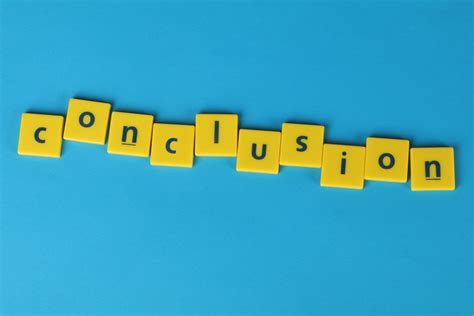

**Question 1: The most important factors that affect diabetes outcome are Glucose levels, Age and Insulin levels according to both the decision tree split features and the correlation matrix heatmap. However, the other features such as Skin Thickness, BMI values, Pregnancies and Diabetes Pedigree Function also play a part in affecting diabetes outcome although they might not be the most important factors.**

**Question 2: We have created many interactive plots such as box-plots, heatmaps, Contour Density Plots, Bar Graphs, Violin Plots and Kernel Density Estimate (KDE) plots to visualise the relationship between the features and the outcome (diabetes or no diabetes) of patients. We also included decision tree diagrams as an add-on to the interactive plots for feature inferences.**

**Question 3: The risk of a person of Age 54, length 178 cm and weight 96 kg, and Glucose levels of 125 mg/dL getting diabetes is low as shown by the results of the decision tree. To measure the exact percentage risk of the patient above getting diabetes, we can include multiple iterations of the decision trees of various max_depth, min_sample_leaf and min_sample_split to create an array of "Diabetes" and "No Diabetes" and count the number of times each outcome type is made.**

We have come to the end of the project on What do your blood sugars tell you? Happy looking!